## Libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import pickle
import random

import matplotlib.pyplot as plt
import seaborn as sns

## Utility Functions

In [2]:
# pickle list to text file
def write_list_to_text_file(a_list, list_file):
    with open(list_file, 'wb') as fp:
        pickle.dump(a_list, fp)
        print('Done writing list into binary file')

# read from pickle text file
def read_list(list_file):
    with open(list_file, 'rb') as fp:
        n_list = pickle.load(fp)
        return n_list

# gets next date in df index
def find_next_date(date, df):
    date = pd.to_datetime(date)
    while date not in df.index:
            date += pd.offsets.Day(1)
    return date

# calculate monthly percent returns
def calc_monthly_returns(df):
    return (df.pct_change()+1)[1:].resample('M').prod(min_count=15)

# get rolling percent returns of n months
def get_rolling_ret(df, n):
    return df.rolling(n).apply(np.prod)[n-1:]

## Getting Data

In [2]:
# DO NOT RUN
# INFO CONTAINED IN LIST IN nasdaq_tickers.txt
# USE PICKLE

# nasdaq_tickers = []
# for character in [chr(i) for i in np.arange(26)+ord('A')]:
#     nasdaq_tickers.append(
#         pd.read_html(
#             'https://eoddata.com/stocklist/NASDAQ/' + character + '.htm'
#         )[4]['Code'].tolist()
#     )
# nasdaq_tickers = list(np.concatenate(nasdaq_tickers).flat)

In [3]:
def write_list_to_text_file(a_list, list_file):
    with open(list_file, 'wb') as fp:
        pickle.dump(a_list, fp)
        print('Done writing list into binary file')

def read_list(list_file):
    with open(list_file, 'rb') as fp:
        n_list = pickle.load(fp)
        return n_list

In [4]:
# DO NOT RUN
# FILE ALREADY POPULATED

# write_list_to_text_file(nasdaq_tickers, 'nasdaq_tickers.txt')

In [5]:
# get all nasdaq tickers
nasdaq_tickers_full = read_list('nasdaq_tickers.txt')

In [6]:
# get tickers in nasdaq 100
nasdaq_100_tickers = pd.read_html(
        'https://en.wikipedia.org/wiki/Nasdaq-100'
    )[4].Ticker.to_list()

In [7]:
nasdaq_100_start_2010_close = yf.download(
    nasdaq_100_tickers, start='2010-01-01'
)['Close']

nasdaq_100_start_2010_adjclose = yf.download(
    nasdaq_100_tickers, start='2010-01-01'
)['Adj Close']

[*********************100%***********************]  101 of 101 completed
[*********************100%***********************]  101 of 101 completed


In [8]:
nasdaq_100_start_2010_adjclose

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.515214,NaN,37.090000,23.067616,27.491213,25.670000,21.142134,18.500000,11.328532,9.700000,...,NaN,18.767347,29.074846,44.240002,26.326157,15.840572,NaN,13.504493,NaN,NaN
2010-01-05,6.526478,NaN,37.700001,23.031202,27.343582,25.280001,20.900101,18.010000,11.241389,9.710000,...,NaN,18.659105,29.269646,42.779999,26.114422,16.463976,NaN,13.344340,NaN,NaN
2010-01-06,6.422664,NaN,37.619999,22.987501,27.279408,25.340000,21.111885,17.480000,11.217621,9.570000,...,NaN,18.522018,29.649523,42.029999,25.916807,16.709249,NaN,13.369967,NaN,NaN
2010-01-07,6.410791,NaN,36.889999,22.805412,27.266562,25.480000,21.293411,17.430000,11.098793,9.470000,...,NaN,18.579733,29.600817,41.500000,26.072083,16.699030,NaN,13.312306,NaN,NaN
2010-01-08,6.453413,NaN,36.689999,22.936510,27.228054,26.260000,21.547556,17.660000,11.526581,9.430000,...,NaN,19.005444,29.220951,40.669998,26.107365,16.750128,NaN,13.318709,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-04,126.360001,88.720001,341.410004,165.910004,238.779999,187.960007,95.519997,224.630005,99.309998,64.660004,...,113.639999,169.169998,180.250000,286.829987,37.490002,10.380000,171.220001,70.669998,67.650002,111.589996
2023-01-05,125.019997,87.709999,328.440002,159.690002,233.630005,182.070007,93.779999,219.820007,97.919998,62.330002,...,110.339996,166.929993,177.639999,287.890015,35.189999,10.860000,160.190002,69.239998,65.620003,104.389999
2023-01-06,129.619995,88.519997,332.750000,165.520004,240.160004,187.190002,96.529999,220.770004,104.269997,63.959999,...,113.059998,175.160004,182.880005,290.209991,36.610001,11.320000,161.139999,71.290001,69.510002,103.959999


In [9]:
nasdaq_100_start_2010_adjclose_nadrop = nasdaq_100_start_2010_adjclose.dropna(axis=1)

In [10]:
nasdaq_100_start_2010_adjclose_nadrop.shape

(3278, 78)

In [11]:
# daily percent change
nasdaq_100_start_2010_adjclose_nadrop.pct_change()[:10]

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.016446,-0.001579,-0.005370,-0.015193,-0.011448,-0.026486,-0.007692,0.001031,-0.008662,...,-0.000949,0.061539,-0.008467,0.002509,-0.005768,0.006700,-0.033002,-0.008043,0.039355,-0.011859
2010-01-06,-0.015907,-0.002122,-0.001897,-0.002347,0.002373,0.010133,-0.029428,-0.002114,-0.014418,-0.007515,...,0.027540,0.000000,-0.001798,-0.067585,-0.007347,0.012979,-0.017532,-0.007567,0.014898,0.001920
2010-01-07,-0.001849,-0.019405,-0.007921,-0.000471,0.005525,0.008598,-0.002860,-0.010593,-0.010449,-0.009156,...,-0.005545,-0.028986,-0.002701,0.009396,0.003116,-0.001643,-0.012610,0.005991,-0.000612,-0.004313
2010-01-08,0.006648,-0.005422,0.005749,-0.001412,0.030612,0.011935,0.013196,0.038544,-0.004224,0.008886,...,0.005576,0.000000,0.007223,-0.055851,0.022913,-0.012833,-0.020000,0.001353,0.003060,0.000481
2010-01-11,-0.008821,-0.013083,-0.005716,0.004479,-0.000381,0.010391,-0.006795,0.021993,-0.030753,0.004404,...,-0.020333,0.029851,-0.008516,0.012676,-0.012908,-0.002333,0.028522,0.001622,-0.003356,0.009620
2010-01-12,-0.011375,-0.015189,-0.041521,-0.007041,-0.013714,-0.010006,-0.017674,-0.045058,-0.053611,-0.017362,...,-0.026415,-0.014492,-0.014467,-0.116829,-0.041923,0.007685,-0.000956,-0.008367,-0.026630,0.011910
2010-01-13,0.014106,0.017386,-0.000333,0.007327,0.013905,0.012353,0.020313,0.004930,0.057803,0.008924,...,0.032946,-0.014706,0.009633,-0.003150,0.004416,-0.000332,0.022254,0.009255,0.005975,0.015537
2010-01-14,-0.005792,-0.010474,-0.001000,-0.002815,0.013333,0.003882,-0.025597,0.005606,-0.016393,-0.006545,...,0.000938,0.014926,0.008178,-0.015798,-0.012390,-0.007960,-0.033240,0.000809,-0.008128,0.001855


In [12]:
# calculate monthly returns
nd100st2010adjclnadrp_monthly_returns = (
    nasdaq_100_start_2010_adjclose_nadrop.pct_change()+1
)[1:].resample('M').prod()

In [13]:
# view monthly returns
nd100st2010adjclnadrp_monthly_returns

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.897435,0.870855,0.851279,0.952370,0.926763,0.991700,1.013514,0.851748,0.769072,1.013167,...,0.979127,1.292308,0.947861,0.706399,0.869486,0.942043,0.867993,0.966488,0.956774,0.985769
2010-02-28,1.065396,1.072755,1.084570,1.020103,1.171921,0.982245,0.965333,1.009773,1.060322,0.968023,...,0.988372,1.214286,1.029619,1.095915,1.083556,1.006401,1.055729,0.981576,1.050236,1.001443
2010-03-31,1.148470,1.020779,0.992337,1.077120,1.053802,1.016657,1.068508,1.100490,1.171934,1.057057,...,1.170588,0.852941,1.021461,1.147488,1.003691,0.996467,1.008140,1.052497,1.084751,1.030484
2010-04-30,1.111022,0.949958,1.038515,0.975264,1.156910,1.003510,0.879007,1.023014,0.978425,0.957721,...,1.055276,1.356322,1.012964,1.077684,1.067762,0.993617,0.948618,0.947695,1.146197,1.025944
2010-05-31,0.983875,0.954762,0.982144,0.942586,0.860841,0.943656,0.877647,0.942779,0.944873,0.903507,...,1.050000,0.872881,0.945278,1.178244,0.938869,1.079586,0.892185,0.915058,0.972373,0.942069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,0.879023,0.736932,0.919554,0.929452,0.925944,0.862774,0.849856,0.870947,0.746554,0.937994,...,0.886837,0.937603,0.882926,0.931995,0.936868,0.912665,1.027612,0.895608,0.868580,0.867592
2022-10-31,1.109551,1.157340,1.023540,1.068571,1.147216,1.017004,0.938149,1.077627,0.947917,1.199423,...,0.929328,1.057793,0.957579,1.129612,1.046070,1.072128,1.077571,1.162420,1.130435,1.017344
2022-11-30,0.966973,1.082983,1.205371,1.092842,0.942370,1.111336,1.012146,1.244386,1.292541,1.066664,...,0.954624,1.078573,1.160622,0.999340,1.123451,1.004813,1.014103,1.150369,0.876923,1.078483


## Random Strategy Bot

In [14]:
# random number of stocks to buy
n_stock_purchases = np.random.randint(1, 79)

# CONSTANT
n_stock_purchases = 10
print(n_stock_purchases)

10


In [15]:
# random tickers to purchase
random_tickers = random.sample(
    list(nasdaq_100_start_2010_adjclose_nadrop.columns),
    n_stock_purchases
)

print(random_tickers[:10])

['ADSK', 'SNPS', 'AMZN', 'CDNS', 'VRTX', 'ADP', 'GOOG', 'AVGO', 'EA', 'INTC']


In [16]:
# random percent of portfolio to invest in each ticker
random_percent_portfolio_invested = np.random.random(n_stock_purchases)
random_percent_portfolio_invested /= random_percent_portfolio_invested.sum()
print(random_percent_portfolio_invested)

[0.02201409 0.0671781  0.1349911  0.05865036 0.13815177 0.11640084
 0.12605249 0.1559594  0.15496747 0.0256344 ]


In [17]:
# total portfolio value
porfolio_total_dollars = 1000000.0

In [18]:
# total amount invested in each stock
portfolio_invest_totals = (
    porfolio_total_dollars * random_percent_portfolio_invested
)
print(portfolio_invest_totals)

[ 22014.08632159  67178.09921994 134991.10241583  58650.36195394
 138151.76625299 116400.83842954 126052.48880877 155959.39595349
 154967.46504481  25634.3955991 ]


In [19]:
nasdaq_100_start_2010_adjclose_nadrop[random_tickers]

,ADSK,SNPS,AMZN,CDNS,VRTX,ADP,GOOG,AVGO,EA,INTC
Date,,,,,,,,,,
2010-01-04,25.670000,22.440001,6.695000,6.120000,44.240002,27.491213,15.610239,13.895461,17.934481,14.020260
2010-01-05,25.280001,22.250000,6.734500,6.060000,42.779999,27.343582,15.541497,13.998608,18.438425,14.013546
2010-01-06,25.340000,22.209999,6.612500,6.130000,42.029999,27.279408,15.149715,14.109123,17.964125,13.966540
2010-01-07,25.480000,22.150000,6.500000,6.250000,41.500000,27.266562,14.797037,14.020713,17.825792,13.832253
2010-01-08,26.260000,22.309999,6.676000,6.340000,40.669998,27.228054,14.994298,14.123867,18.181515,13.986689
...,...,...,...,...,...,...,...,...,...,...
2023-01-04,187.960007,320.929993,85.139999,159.229996,286.829987,238.779999,88.709999,560.239990,125.010002,27.680000
2023-01-05,182.070007,315.040009,83.120003,156.800003,287.890015,233.630005,86.769997,555.020020,124.680000,27.559999
2023-01-06,187.190002,320.540009,86.080002,159.660004,290.209991,240.160004,88.160004,588.429993,123.889999,28.730000


In [20]:
# shares purchased, total dollar per ticker, total investment, uninvested amount
def purchase_data(purchase_date):
    random_tickers_df = nasdaq_100_start_2010_adjclose_nadrop[random_tickers]
    ticker_prices = random_tickers_df.loc[purchase_date].values

    shares_purchased = portfolio_invest_totals // ticker_prices
    funds_per_ticker = shares_purchased * ticker_prices
    total_investment = sum(shares_purchased * ticker_prices)
    portfolio_remainder = porfolio_total_dollars - total_investment
    return shares_purchased, funds_per_ticker, total_investment, portfolio_remainder

In [21]:
sp, fpt, ti, pr = purchase_data('2010-01-05')
print(sp)
print(fpt)
print(ti)
print(pr)

[  870.  3019. 20044.  9678.  3229.  4256.  8110. 11141.  8404.  1829.]
[ 21993.60059738  67172.75       134986.31662369  58648.67944622
 138136.61605835 116374.28564453 126041.5425396  155958.48766708
 154956.52423859  25630.77561569]
999899.5784311295
100.42156887054443


In [22]:
# January 2010 percent change in random choice tickers
random_tickers_change = nd100st2010adjclnadrp_monthly_returns[random_tickers]
random_ticker_change_2010m1 = random_tickers_change.loc['2010-01-31'].values
print(random_ticker_change_2010m1)

[0.92676279 0.94786096 0.93659448 0.94934641 0.86799277 0.95237008
 0.84553651 0.92152718 0.89696967 0.92911896]


In [23]:
# new portfolio value
funds_change = fpt * random_ticker_change_2010m1
new_portfolio_value = sum(funds_change) + pr
print(new_portfolio_value)

910090.0767916141


In [24]:
def random_strategy_monthly(portfolio_value, df, month_begin, month_end, verbose=False):
    # random number of tickers
    n_stock_purchases = np.random.randint(1, df.shape[1])
    # random ticker names to purchase
    random_tickers = random.sample(list(df.columns), n_stock_purchases)
    # random percent of portfolio to invest in each ticker
    random_percent_portfolio_invested = np.random.random(n_stock_purchases)
    random_percent_portfolio_invested /= random_percent_portfolio_invested.sum()
    # total amount invested in each ticker
    portfolio_invest_totals = porfolio_total_dollars * random_percent_portfolio_invested
    # dataframe of tickers
    random_df = df[random_tickers]
    # ticker prices
    ticker_prices = random_df.loc[month_begin].values
    # shares purchased per ticker
    shares_purchased = portfolio_invest_totals // ticker_prices
    # total dollars invested in each ticker
    dollars_per_ticker = shares_purchased * ticker_prices
    # total amount invested
    total_investment = sum(shares_purchased * ticker_prices)
    # uninvested portfolio amount
    portfolio_remainder = porfolio_total_dollars - total_investment

    # ticker percent change by month
    random_df_pct_change = (random_df.pct_change()+1)[1:].resample('M').prod()
    month_end_change = random_df_pct_change.loc[month_end].values
    
    # total dollar change by ticker
    total_dollar_change = dollars_per_ticker * month_end_change
    # portfolio total dollar amount after investment
    new_portfolio_value = sum(total_dollar_change) + portfolio_remainder

    # expanded info for viewing choices
    if verbose:
        n_verbose = 5
        print('Stocks:', n_stock_purchases)
        print('Tickers:', random_tickers[:n_verbose])
        print('Percent Portfolio Invested:', random_percent_portfolio_invested[:n_verbose])
        print('Total Invested Per Ticker:', portfolio_invest_totals[:n_verbose])
        print('Ticker Prices', ticker_prices[:n_verbose])
        print('Shares Purchased:', shares_purchased[:n_verbose])
        print('Dollars Per Ticker:', dollars_per_ticker[:n_verbose])
        print('Total Investment:', total_investment)
        print('Portfolio Remainder:', portfolio_remainder)
        print('Month End Change:', month_end_change[:n_verbose])
        print('Total Dollar Change:', total_dollar_change[:n_verbose])

    return new_portfolio_value

In [25]:
portfolio_total_dollars = 1000000.0

In [26]:
# test random strategy against January 2010
random_strategy_monthly(
    portfolio_total_dollars,
    nasdaq_100_start_2010_adjclose_nadrop,
    '2010-01-04',
    '2010-01-31',
    verbose=True
)

Stocks: 20
Tickers: ['FAST', 'ROST', 'TMUS', 'NVDA', 'SGEN']
Percent Portfolio Invested: [0.06467745 0.01563822 0.02754836 0.04635591 0.02065477]
Total Invested Per Ticker: [64677.44877233 15638.21871062 27548.36169547 46355.90545464
 20654.77464891]
Ticker Prices [ 7.55179405  9.38418484 13.20704365  4.24230957 10.53999996]
Shares Purchased: [ 8564.  1666.  2085. 10927.  1959.]
Dollars Per Ticker: [64673.56426239 15634.05193901 27536.68600559 46355.7166748
 20647.85992527]
Total Investment: 999804.6807804108
Portfolio Remainder: 195.3192195892334
Month End Change: [0.9869139  1.0758959  0.70639904 0.83234181 0.97912711]
Total Dollar Change: [63827.23940277 16820.61236763 19451.88860893 38583.80122375
 20216.87940216]


912776.5123672488

In [27]:
# for finding purchase dates
        # finds next available market open date after 1st of month
def find_next_date(date):
    date = pd.to_datetime(date)
    while date not in nasdaq_100_start_2010_adjclose_nadrop.index:
            date += pd.offsets.Day(1)
    return date

In [28]:
find_next_date('2010-01-01')

Timestamp('2010-01-04 00:00:00')

In [29]:
# get purchase and sell dates
sell_dates = pd.date_range('2010-01-01', '2023-01-01', freq='1M')
dates = sell_dates-pd.offsets.MonthBegin(1)
purchase_dates = pd.DatetimeIndex([find_next_date(date) for date in dates])


In [30]:
print(sell_dates[-5:])
print(purchase_dates[-5:])

DatetimeIndex(['2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31'],
              dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2022-08-01', '2022-09-01', '2022-10-03', '2022-11-01',
               '2022-12-01'],
              dtype='datetime64[ns]', freq=None)


In [31]:
# test random strategy against period January 2010 to current
df = nasdaq_100_start_2010_adjclose_nadrop
portfolio_history = [1000000.0]
updated_portfolio_amount = 0.0
for i in range(len(purchase_dates)):
    portfolio_return = random_strategy_monthly(
        updated_portfolio_amount,
        df,
        purchase_dates[i],
        sell_dates[i]
    )

    portfolio_history.append(portfolio_return)
    updated_portfolio_amount = portfolio_return

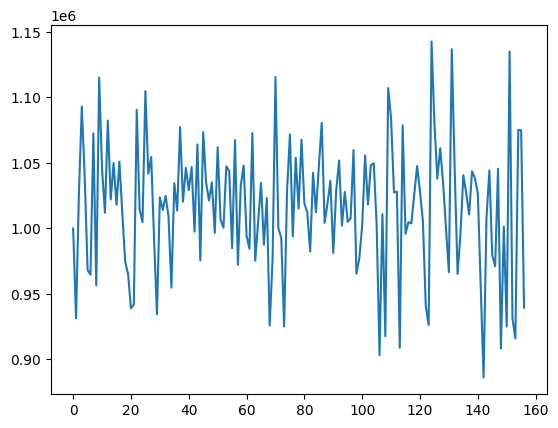

In [32]:
# plot strategy returns
plt.plot(portfolio_history)

In [33]:
# test random strategy against period January 2010 to current
df = nasdaq_100_start_2010_adjclose_nadrop
tested_portfolios = []
for j in range(100):
    portfolio_history = [1000000.0]
    updated_portfolio_amount = 0.0
    for i in range(len(purchase_dates)):
        portfolio_return = random_strategy_monthly(
            updated_portfolio_amount,
            df,
            purchase_dates[i],
            sell_dates[i]
        )

        portfolio_history.append(portfolio_return)
        updated_portfolio_amount = portfolio_return

    tested_portfolios.append(portfolio_history)
    

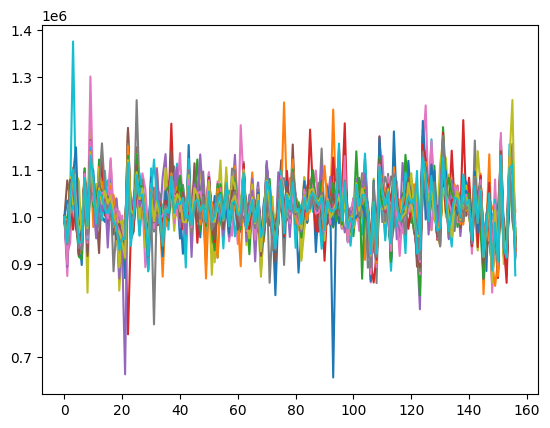

In [34]:
# plot returns of 100 tested portfolios
for i in range(len(tested_portfolios)):
    plt.plot(tested_portfolios[i])

In [35]:
# transpose for analysis
tested_portfolios_T = np.array(tested_portfolios).T

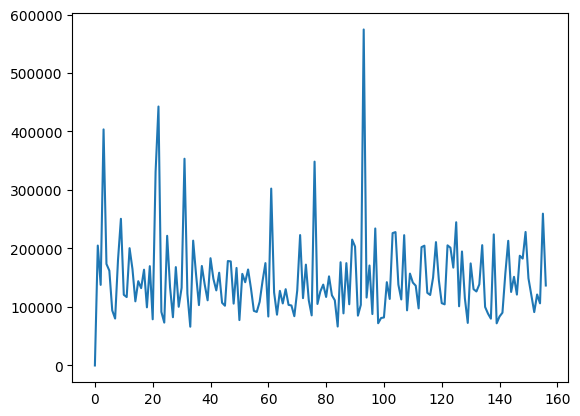

In [36]:
# high - low spread of returns
return_spread = [max(month_returns)-min(month_returns) for month_returns in tested_portfolios_T]
plt.plot(return_spread)

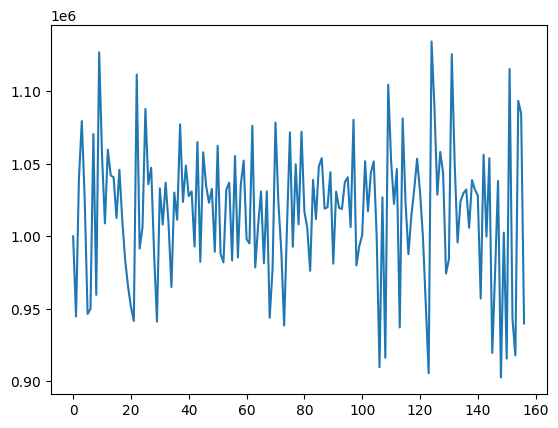

In [37]:
# mean of returns
return_average = [month_returns.mean() for month_returns in tested_portfolios_T]
plt.plot(return_average)

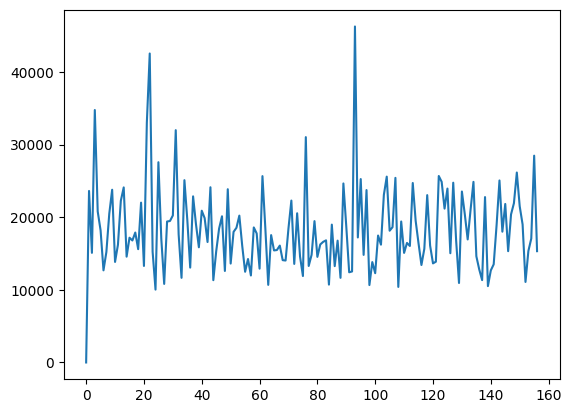

In [38]:
# standard deviation of returns
return_std = [np.std(month_returns) for month_returns in tested_portfolios_T]
plt.plot(return_std)

## Cascading Momentum Strategy (Nasdaq 78)

In [39]:
# get rolling returns
    # accumulate percent returns of n months
def get_rolling_ret(df, n):
    return df.rolling(n).apply(np.prod)

In [40]:
# shorter dataframe names for easier use
nd78 = nasdaq_100_start_2010_adjclose_nadrop.copy()
nd78_month_pct = nd100st2010adjclnadrp_monthly_returns.copy()

In [41]:
# original nasdaq price dataframe (78 companies)
nd78.head()

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.515214,37.090000,23.067616,27.491213,25.670000,21.142134,18.50,11.328532,9.70,43.267174,...,10.54,0.579823,22.440001,13.207044,18.767347,29.074846,44.240002,26.326157,15.840572,13.504493
2010-01-05,6.526478,37.700001,23.031202,27.343582,25.280001,20.900101,18.01,11.241389,9.71,42.892376,...,10.53,0.615505,22.250000,13.240186,18.659105,29.269646,42.779999,26.114422,16.463976,13.344340
2010-01-06,6.422664,37.619999,22.987501,27.279408,25.340000,21.111885,17.48,11.217621,9.57,42.570042,...,10.82,0.615505,22.209999,12.345354,18.522018,29.649523,42.029999,25.916807,16.709249,13.369967
2010-01-07,6.410791,36.889999,22.805412,27.266562,25.480000,21.293411,17.43,11.098793,9.47,42.180267,...,10.76,0.597664,22.150000,12.461351,18.579733,29.600817,41.500000,26.072083,16.699030,13.312306
2010-01-08,6.453413,36.689999,22.936510,27.228054,26.260000,21.547556,17.66,11.526581,9.43,42.555061,...,10.82,0.597664,22.309999,11.765371,19.005444,29.220951,40.669998,26.107365,16.750128,13.318709


In [42]:
# monthly percent change for each stock
nd78_month_pct.head()

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.897435,0.870855,0.851279,0.952370,0.926763,0.991700,1.013514,0.851748,0.769072,1.013167,...,0.979127,1.292308,0.947861,0.706399,0.869486,0.942043,0.867993,0.966488,0.956774,0.985769
2010-02-28,1.065396,1.072755,1.084570,1.020103,1.171921,0.982245,0.965333,1.009773,1.060322,0.968023,...,0.988372,1.214286,1.029619,1.095915,1.083556,1.006401,1.055729,0.981576,1.050236,1.001443
2010-03-31,1.148470,1.020779,0.992337,1.077120,1.053802,1.016657,1.068508,1.100490,1.171934,1.057057,...,1.170588,0.852941,1.021461,1.147488,1.003691,0.996467,1.008140,1.052497,1.084751,1.030484
2010-04-30,1.111022,0.949958,1.038515,0.975264,1.156910,1.003510,0.879007,1.023014,0.978425,0.957721,...,1.055276,1.356322,1.012964,1.077684,1.067762,0.993617,0.948618,0.947695,1.146197,1.025944
2010-05-31,0.983875,0.954762,0.982144,0.942586,0.860841,0.943656,0.877647,0.942779,0.944873,0.903507,...,1.050000,0.872881,0.945278,1.178244,0.938869,1.079586,0.892185,0.915058,0.972373,0.942069


In [43]:
# 12 month return for each stock
nd78_12m = get_rolling_ret(nd78_month_pct, 12)[11:]
nd78_12m.head()

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,1.507219,0.829873,1.223493,1.116249,1.488118,1.081273,1.056216,1.004638,0.843299,0.951144,...,1.418406,2.507693,1.199198,1.584693,1.273197,1.141708,0.791817,1.064760,1.345161,1.168597
2011-01-31,1.766739,1.023220,1.481500,1.213103,1.709962,1.081231,1.110933,1.317179,1.049598,0.941860,...,1.588178,1.928571,1.275505,2.296625,1.533648,1.203058,1.012760,1.143530,1.314902,1.186474
2011-02-28,1.726176,0.995671,1.402916,1.241332,1.508250,1.118132,1.151934,1.371910,1.164349,0.906730,...,1.455882,1.774509,1.265753,2.333874,1.486341,1.143110,1.151209,1.253718,1.383949,1.203362
2011-03-31,1.483021,0.937518,1.403911,1.191077,1.501362,1.080139,1.058945,1.185176,0.927724,0.893216,...,1.304020,1.896551,1.236030,2.293785,1.437210,1.161702,1.172743,1.103233,1.180823,1.177905
2011-04-30,1.341032,0.998512,1.383770,1.293883,1.323330,1.117405,1.420000,1.163706,1.003308,0.991973,...,1.318254,1.686440,1.208738,2.205767,1.388809,1.174162,1.419912,1.238947,1.142783,1.169265


In [44]:
# 6 month return for each stock
nd78_6m = get_rolling_ret(nd78_month_pct, 6)[5:]
nd78_6m.head()

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-30,1.175318,0.712591,0.892526,0.955278,0.948968,0.947777,0.803784,0.849287,0.754639,0.911296,...,1.137571,1.461539,0.930036,1.027603,0.903714,1.001675,0.743671,0.721568,1.151935,1.000755
2010-07-31,1.339425,0.889164,1.118074,1.028217,1.241698,1.064595,0.925333,0.978861,1.004021,0.932455,...,1.180233,1.226191,1.026798,1.589698,1.107513,1.055832,0.876562,0.798318,1.301753,1.083179
2010-08-31,1.188056,0.799423,0.974707,0.942988,0.994620,1.079116,0.883425,0.857322,0.709229,0.901608,...,1.122549,0.941176,1.043836,1.448946,0.952975,0.983039,0.821658,0.770512,1.211878,1.097358
2010-09-30,1.207447,0.739327,1.105542,0.961256,1.088155,1.086015,1.012410,0.877449,0.766990,0.920956,...,1.300670,1.379310,1.107287,1.477401,1.119402,0.993262,0.845853,0.912376,1.288843,1.108518
2010-10-31,1.152782,0.837798,1.142228,1.043325,1.065019,1.118359,1.001176,0.906910,0.809261,0.997906,...,1.302381,1.271186,1.128861,1.363041,1.147295,1.063883,0.987877,0.973653,1.153369,1.122352


In [45]:
# 3 month return for each stock
nd78_3m = get_rolling_ret(nd78_month_pct, 3)[2:]
nd78_3m.head()

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-31,1.098079,0.953626,0.916196,1.046438,1.144527,0.990319,1.045405,0.946501,0.955670,1.036729,...,1.132827,1.338462,0.996881,0.888331,0.945614,0.944724,0.923825,0.998485,1.090000,1.017285
2010-04-30,1.359419,1.040248,1.117710,1.071594,1.428752,1.002113,0.906667,1.136820,1.215818,0.979993,...,1.220930,1.404762,1.065350,1.355240,1.161251,0.996444,1.009635,0.979069,1.305799,1.058744
2010-05-31,1.255400,0.925830,1.012155,0.990165,1.049498,0.962742,0.824309,1.061397,1.083439,0.914679,...,1.297059,1.009804,0.978082,1.457050,1.006190,1.068905,0.853231,0.912721,1.208989,0.995972
2010-06-30,1.070340,0.747243,0.974165,0.912885,0.829136,0.957042,0.768873,0.897291,0.789644,0.879011,...,1.004188,1.091954,0.932946,1.156780,0.955690,1.060284,0.804991,0.722663,1.056821,0.983752
2010-07-31,0.985292,0.854762,1.000326,0.959521,0.869079,1.062351,1.020588,0.861052,0.825799,0.951492,...,0.966667,0.872881,0.963813,1.173001,0.953724,1.059600,0.868197,0.815385,0.996902,1.023079


In [46]:
# get top 10 tickers by cascading momentum strategy
    # top 50 performers over 12 months
    # of those, top 30 performers over 6 months
    # of those, top 10 performers over 3 months
def get_top10_momentum_stocks(previous_month_end):
    top_50 = nd78_12m.loc[previous_month_end].nlargest(50).index
    top_30 = nd78_6m.loc[previous_month_end, top_50].nlargest(30).index
    return nd78_3m.loc[previous_month_end, top_30].nlargest(10).index

In [47]:
# constant previous month end for testing
previous_month_end = pd.to_datetime('2010-12-31')

In [48]:
chosen_stocks = get_top10_momentum_stocks('2010-12-31')
chosen_stocks

Index(['LULU', 'SIRI', 'BKR', 'FTNT', 'ILMN', 'AVGO', 'SBUX', 'ODFL', 'LRCX',
       'HON'],
      dtype='object')

In [49]:
# returns of month after previous month end
cascading_strategy_month_pct_ret = nd78_month_pct.loc[previous_month_end+pd.offsets.MonthEnd(1), chosen_stocks]
cascading_strategy_month_pct_ret

LULU    1.003800
SIRI    0.993865
BKR     1.198356
FTNT    1.188563
ILMN    1.094727
AVGO    1.010559
SBUX    0.981326
ODFL    1.005627
LRCX    0.963499
HON     1.053612
Name: 2011-01-31 00:00:00, dtype: float64

In [50]:
cascading_strategy_month_pct_ret.mean()

1.0493933207604298

In [51]:
# total portfolio
portfolio_total_dollars = 1000000.0
# equal division of portfolio to invest in each stock
investment_per_stock = np.array([(portfolio_total_dollars / 10) for i in range(10)])
# market open date of investment
investment_date = find_next_date(previous_month_end)
# share prices of chosen stocks
chosen_share_prices = nd78.loc[investment_date, chosen_stocks]
# total shares purchased of each stock (shares are non-divisible)
shares_per_stock = investment_per_stock // chosen_share_prices
# total dollar amount per stock
dollars_invested_per_stock = chosen_share_prices * shares_per_stock
# total dollars invested
total_dollars_invested = dollars_invested_per_stock.sum()
# uninvested dollar amount
uninvested_dollars = portfolio_total_dollars - total_dollars_invested

In [52]:
# cascading strategy return of January 2011
portfolio_total_before_invest = 1000000.0
portfolio_total_after_invest = portfolio_total_before_invest * cascading_strategy_month_pct_ret.mean()
portfolio_total_after_invest

1049393.3207604298

In [53]:
def cascading_strategy_portfolio(initial_portfolio_value, previous_month_end):
    # convert string date to datetime
    previous_month_end = pd.to_datetime(previous_month_end)
    # get 10 chosen stocks
    chosen_stocks = get_top10_momentum_stocks(previous_month_end)
    # equal division of portfolio to invest in each stock
    investment_per_stock = np.array([(initial_portfolio_value / 10) for i in range(10)])
    # market open date of investment
    investment_date = find_next_date(previous_month_end)
    # share prices of chosen stocks
    chosen_share_prices = nd78.loc[investment_date, chosen_stocks]
    # total shares purchased of each stock (shares are non-divisible)
    shares_per_stock = investment_per_stock // chosen_share_prices
    # total dollar amount per stock
    dollars_invested_per_stock = chosen_share_prices * shares_per_stock
    # total dollars invested
    total_dollars_invested = dollars_invested_per_stock.sum()
    # uninvested dollar amount
    uninvested_dollars = initial_portfolio_value - total_dollars_invested

    # returns of month after previous month end
    ticker_percent_returns = nd78_month_pct.loc[previous_month_end+pd.offsets.MonthEnd(1), chosen_stocks]
    # new amount of investments per stock after return month
    return_amounts_per_stock = dollars_invested_per_stock * ticker_percent_returns
    # new investment total
    return_total_dollars = return_amounts_per_stock.sum()
    # new portfolio value
    return return_total_dollars + uninvested_dollars

In [54]:
cascading_strategy_portfolio(1000000.0, '2010-12-31')

1049382.1295025349

In [55]:
all_previous_month_ends = nd78_month_pct.loc['2010-12-31':'2022-11-30'].index
all_previous_month_ends

DatetimeIndex(['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31',
               '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31',
               '2011-08-31', '2011-09-30',
               ...
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=144, freq='M')

In [56]:
# set initial portfolio value
    # variable reused as new portfolio value every month
next_portfolio_total = 1000000.0

portfolio_totals_by_month = [next_portfolio_total]
# run cascading strategy for all months since January 2011
for previous_month_end in all_previous_month_ends:
    new_return = cascading_strategy_portfolio(
        next_portfolio_total,
        previous_month_end
    )
    portfolio_totals_by_month.append(new_return)
    next_portfolio_total = new_return

In [57]:
# add December 2022 (last end-of-month date of returns)
month_indices = all_previous_month_ends.append([pd.DatetimeIndex(['2022-12-31'])])
# dataframe of total portfolio amounts by month end
value_by_month_end = pd.DataFrame(
    data= portfolio_totals_by_month,
    index= month_indices,
    columns= ['Portfolio Value']
)

In [58]:
value_by_month_end.head()

,Portfolio Value
2010-12-31,1.000000e+06
2011-01-31,1.049382e+06
2011-02-28,1.109483e+06
2011-03-31,1.087963e+06
2011-04-30,1.151985e+06


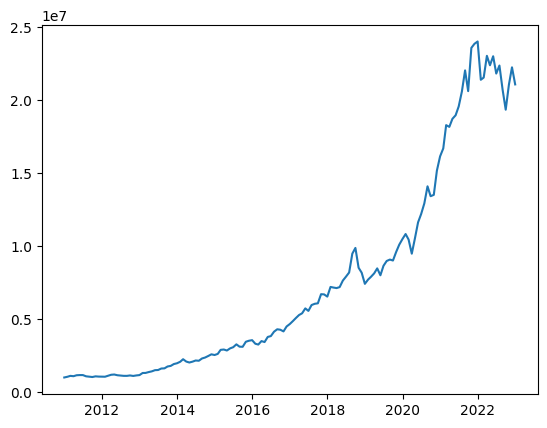

In [59]:
# portfolio value growth over time span
plt.plot(value_by_month_end)

In [60]:
# total portfolio percent return
total_pct_return = ((
    (value_by_month_end.loc[value_by_month_end.last_valid_index()] - 
    value_by_month_end.loc[value_by_month_end.first_valid_index()]) / 
    value_by_month_end.loc[value_by_month_end.first_valid_index()]
) * 100).values[0]

print(f'Total Portfolio Percent Return: {int(total_pct_return)}%')

Total Portfolio Percent Return: 2006%


In [61]:
# portfolio percent return by month
portfolio_pct_return_by_month = value_by_month_end.pct_change()[1:]
portfolio_pct_return_by_month.head()

,Portfolio Value
2011-01-31,0.049382
2011-02-28,0.057273
2011-03-31,-0.019396
2011-04-30,0.058845
2011-05-31,0.010830


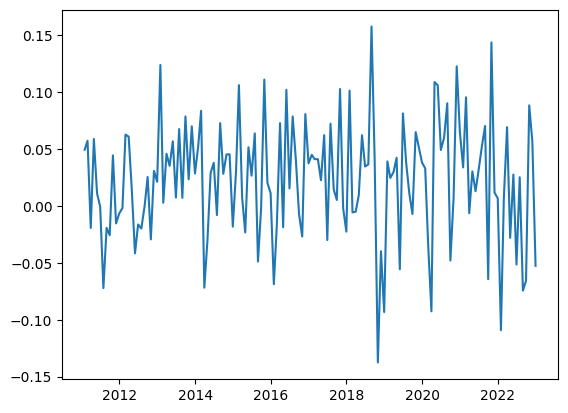

In [62]:
# plot of portfolio percent return
plt.plot(portfolio_pct_return_by_month)

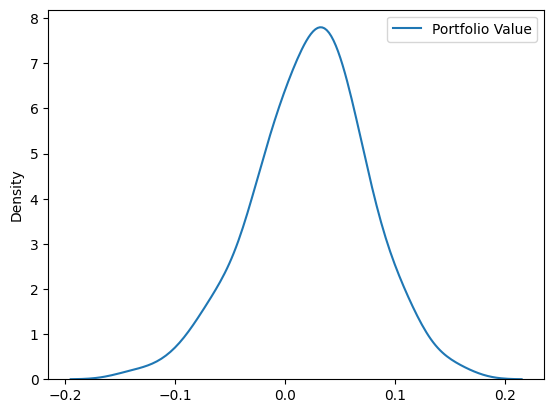

In [63]:
# density plot of percent returns
sns.kdeplot(portfolio_pct_return_by_month);

In [64]:
# numerical evaluation of monthly returns
portfolio_pct_return_by_month.describe()

,Portfolio Value
count,144.000000
mean,0.022702
std,0.051705
min,-0.137573
25%,-0.007096
50%,0.027872
75%,0.056911
max,0.157676


In [65]:
# positive percent returns
positive_returns = portfolio_pct_return_by_month.loc[
    portfolio_pct_return_by_month[
        'Portfolio Value'
    ] > 0.0
]

# negative percent returns
negative_returns = portfolio_pct_return_by_month.loc[
    portfolio_pct_return_by_month[
        'Portfolio Value'
    ] < 0.0
]

In [66]:
# total positive and negative return months
print('Positive return months:', positive_returns.count().values[0])
print('Negative return months:', negative_returns.count().values[0])

Positive return months: 98
Negative return months: 46


In [67]:
# numerical evaluation of postive monthly returns
positive_returns.describe()

,Portfolio Value
count,98.000000
mean,0.050071
std,0.033201
min,0.002798
25%,0.026821
50%,0.043386
75%,0.068794
max,0.157676


In [68]:
# numerical evaluation of postive monthly returns
negative_returns.describe()

,Portfolio Value
count,46.000000
mean,-0.035606
std,0.031824
min,-0.137573
25%,-0.052368
50%,-0.026315
75%,-0.009857
max,-0.000658


## S&P 500 Data

In [2]:
# DO NOT RUN, INFO STORED IN sp500_daily.pkl
# retrieves daily ticker data for all S&P 500 tickers since Jan 2000
# 125 failed downloads (tickers delisted)
# failed downloads have all NaN values

# # get S&P 500 tickers data
# sp_tickers_data = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
# current_sp = sp_tickers_data[0]
# prev_sp = sp_tickers_data[1]

# # sorted list of unique tickers 
# all_sp_500_tickers = sorted(
#     list(set(
#         [t for t in 
#             pd.concat([current_sp.Symbol, prev_sp.Added.Ticker, prev_sp.Removed.Ticker])
#         if str(t) != 'nan']
#     ))
# )

# # retrieve data for tickers
# sp500_daily = yf.download(all_sp_500_tickers, start="2000-01-01")

# # pickle data
# sp500_daily.to_pickle('sp500_daily.pkl')

125 failed downloads (often delisted tickers).

The S&P500 data does not account for survivorship bias (delisted companies can be acquired, go bankrupt, etc). However, for the purposes of a simple cascading momentum strategy, this data is sufficient.

In [8]:
# # DO NOT RUN, INFO STORED IN spy_daily.pkl
# # retrieves daily ticker data for SPY shares
# spy_daily = yf.download('SPY', start='2000-01-01')
# spy_daily.to_pickle('spy_daily.pkl')

[*********************100%***********************]  1 of 1 completed


In [ ]:
spy_daily = pd.read_pickle('spy_daily.pkl')

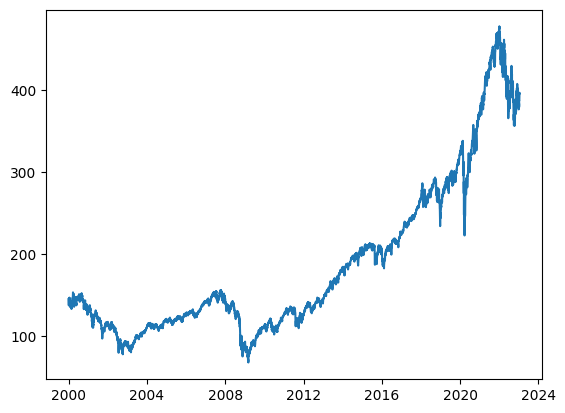

In [11]:
# closing price of SPY
plt.plot(spy_daily.Close)

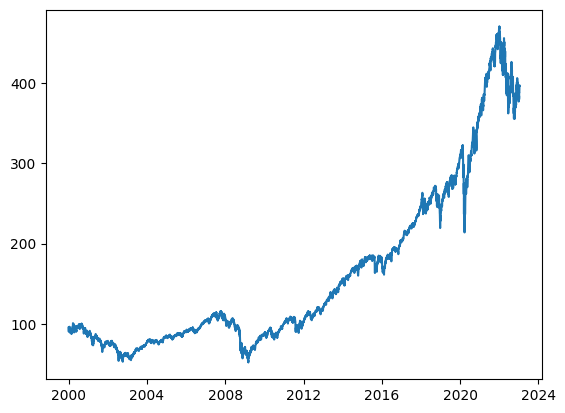

In [10]:
# adjusted close price of SPY
plt.plot(spy_daily['Adj Close'])

The goal of the cascading momentum strategy is to beat SPY's returns, month over month.

In [3]:
# daily S&P 500 ticker data since Jan 2000 (from pickle)
sp500_daily = pd.read_pickle('sp500_daily.pkl')

Multi-Index, Columns are:
- Adj Close
- Close
- High
- Low
- Open
- Volume

In [4]:
# close and adjusted close for companies with ticker values since 2000
sp500_daily_adj = sp500_daily['Adj Close'].dropna(axis=1, how='all')
sp500_daily_close = sp500_daily['Close'].dropna(axis=1, how='all')

For historical price analysis, adjusted close is a simpler option. Calculating monthly returns based on closing data would be more accurate to reality, but the adjusted close value automatically accounts for stock splits, dividends, etc. which eliminates the need for manually calculating these adjustments into the close price (which is a time-expensive process).

## Cascading Momentum Strategy on S&P500

In [3]:
# get SPY (market) and S&P500 ticker data
spy_daily = pd.read_pickle('spy_daily.pkl')
sp500_daily_adj = pd.read_pickle('sp500_daily.pkl')['Adj Close'].dropna(axis=1, how='all')

In [4]:
# alter index for ease of use
sp500_daily_adj = pd.DataFrame(
    data= sp500_daily_adj,
    columns= sp500_daily_adj.columns,
    index= pd.Series(sp500_daily_adj.index.values, name= 'Date')
)

In [5]:
# monthly percent returns for market and tickers
spy_monthly_pct_ret = calc_monthly_returns(spy_daily)[:-1]
sp500_monthly_pct_ret = calc_monthly_returns(sp500_daily_adj)[:-1]

In [6]:
# get 12m, 6m, 3m intervals for percent returns
sp500_12m = get_rolling_ret(sp500_monthly_pct_ret, 12)
sp500_6m = get_rolling_ret(sp500_monthly_pct_ret, 6)
sp500_3m = get_rolling_ret(sp500_monthly_pct_ret, 3)

In [7]:
# get top 10 tickers by cascading momentum strategy
    # top 50 performers over 12 months
    # of those, top 30 performers over 6 months
    # of those, top 10 performers over 3 months 
def get_top10_momentum_stocks(previous_month_end, pct_df_12m, pct_df_6m, pct_df_3m):
    top_50 = pct_df_12m.loc[previous_month_end].nlargest(50).index
    top_30 = pct_df_6m.loc[previous_month_end, top_50].nlargest(30).index
    return pct_df_3m.loc[previous_month_end, top_30].nlargest(10).index

In [8]:
# month return of investment
    # assumes equal amount invested in each ticker
def month_return(tickers, next_month_end, monthly_pct_ret_df):
    return np.average(monthly_pct_ret_df.loc[next_month_end, tickers])

In [9]:
# get previous month end and next month end for strategy analysis
analysis_months = sp500_12m[:-1].index
return_months = sp500_12m[1:].index

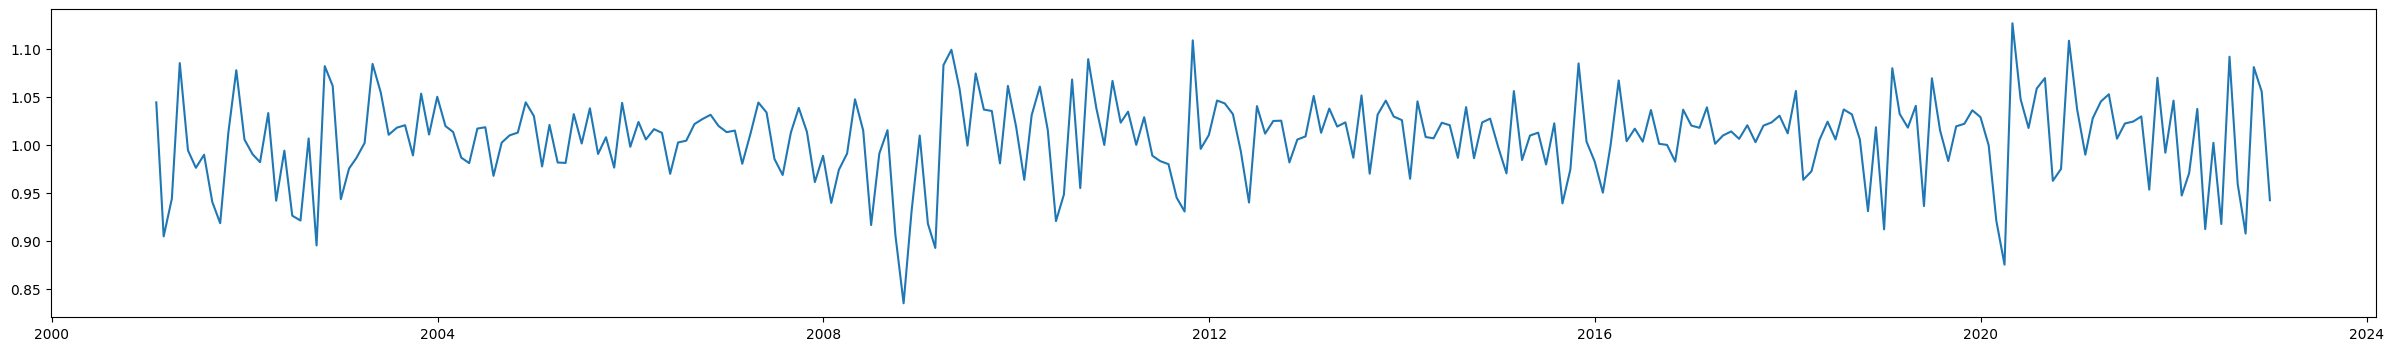

In [10]:
# SPY month returns
fig = plt.figure(figsize=[30, 4])
plt.plot(spy_monthly_pct_ret.loc[return_months[0]:return_months[-1], 'Adj Close']);

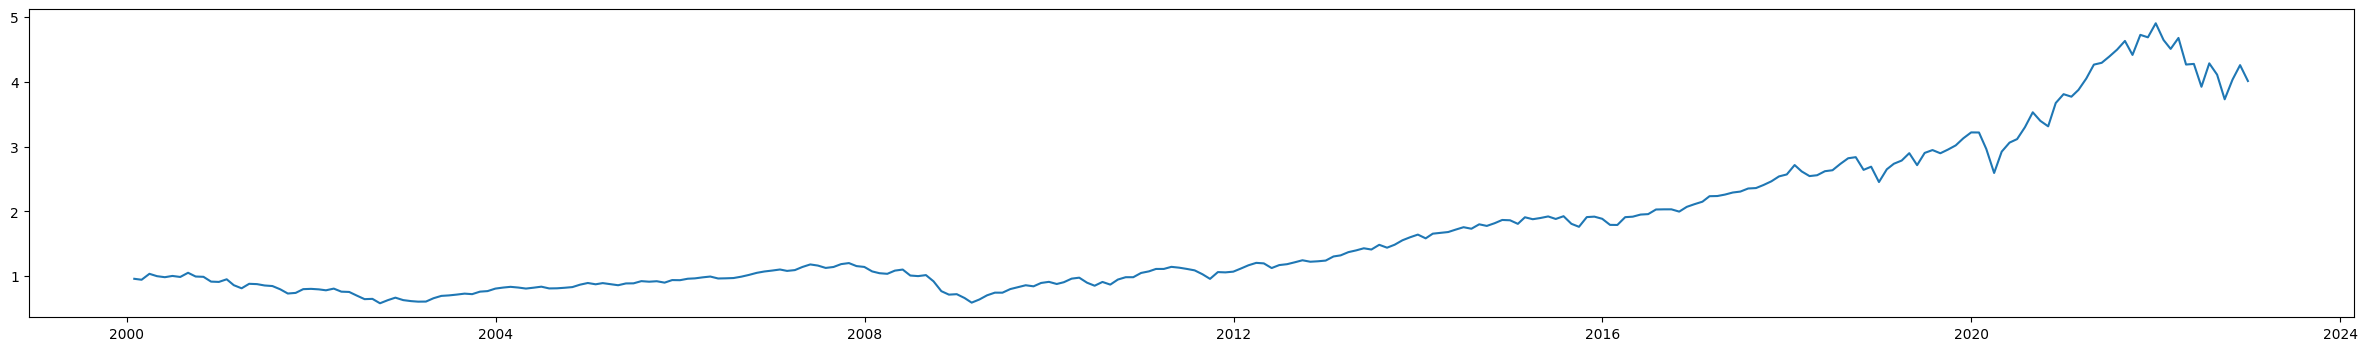

In [11]:
# SPY cumulative month returns
fig = plt.figure(figsize=[30, 4])
plt.plot(spy_monthly_pct_ret['Adj Close'].cumprod());

In [12]:
# calculate returns for cascading momentum strategy
strategy_monthly_returns = []

for month in range(len(analysis_months)):
    tickers = get_top10_momentum_stocks(analysis_months[month], sp500_12m, sp500_6m, sp500_3m)
    strategy_monthly_returns.append(month_return(tickers, return_months[month], sp500_monthly_pct_ret))

In [13]:
# store in Series
strategy_returns = pd.Series(data= strategy_monthly_returns, index= return_months)

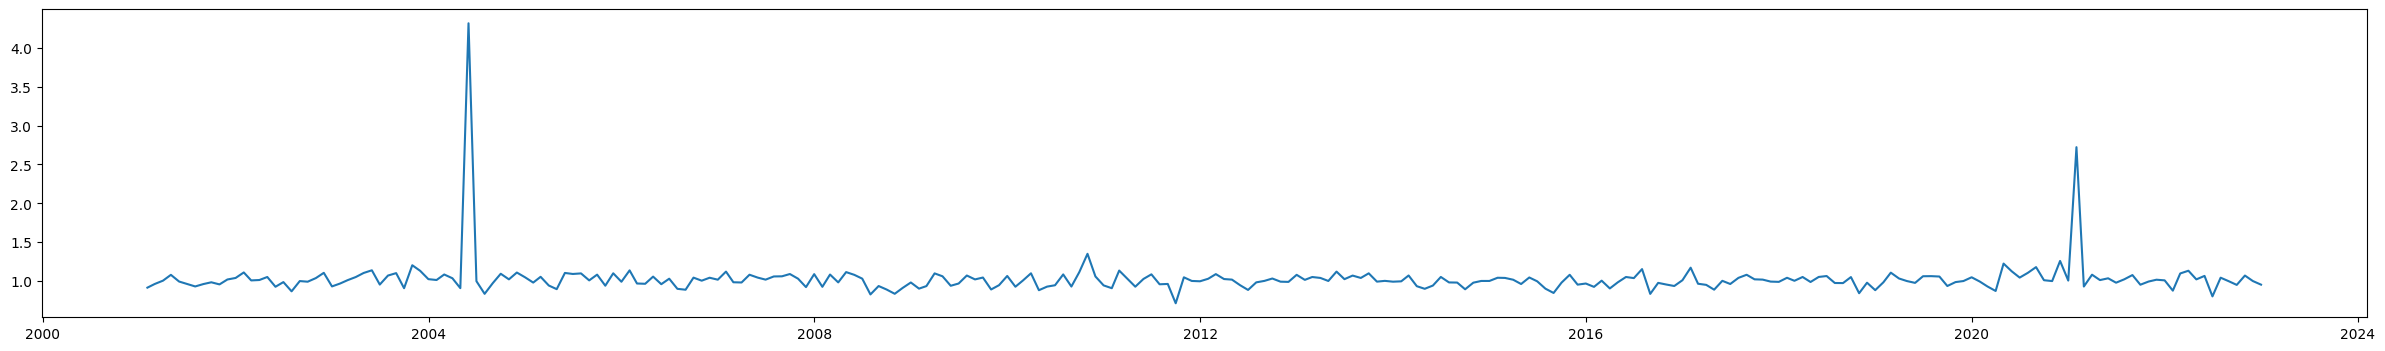

In [14]:
# strategy month returns
fig = plt.figure(figsize=[30, 4])
plt.plot(strategy_returns);

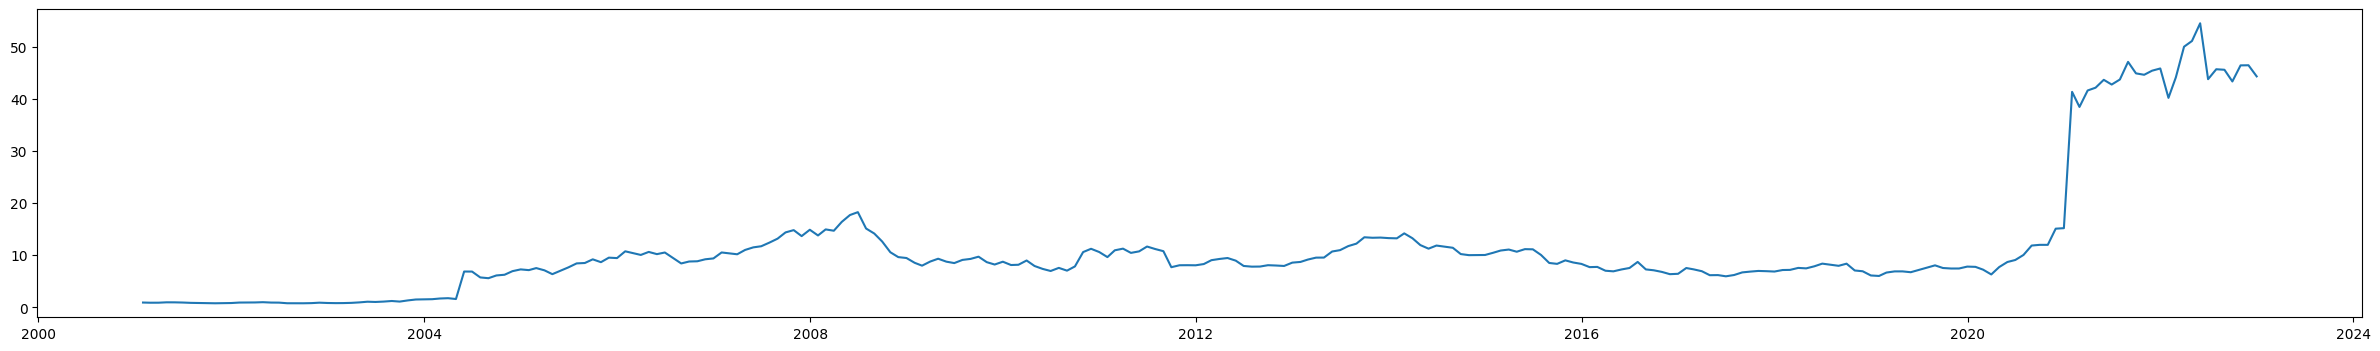

In [15]:
# strategy cumulative month returns
fig = plt.figure(figsize=[30, 4])
plt.plot(strategy_returns.cumprod());

In [16]:
# store SPY returns in Series
market_return = pd.Series(spy_monthly_pct_ret.loc[return_months, 'Adj Close'])

In [17]:
# monthly return comparison DataFrame for SPY vs strategy
market_vs_strategy_monthly = pd.DataFrame(
    data= zip(market_return, strategy_returns),
    columns= ['SPY', 'Strategy'],
    index= return_months
)

# cumulative monthly return comparison DataFrame for SPY vs strategy
market_vs_strategy_cumulative = pd.DataFrame(
    data= zip(market_return.cumprod(), strategy_returns.cumprod()),
    columns= ['SPY', 'Strategy'],
    index= return_months
)

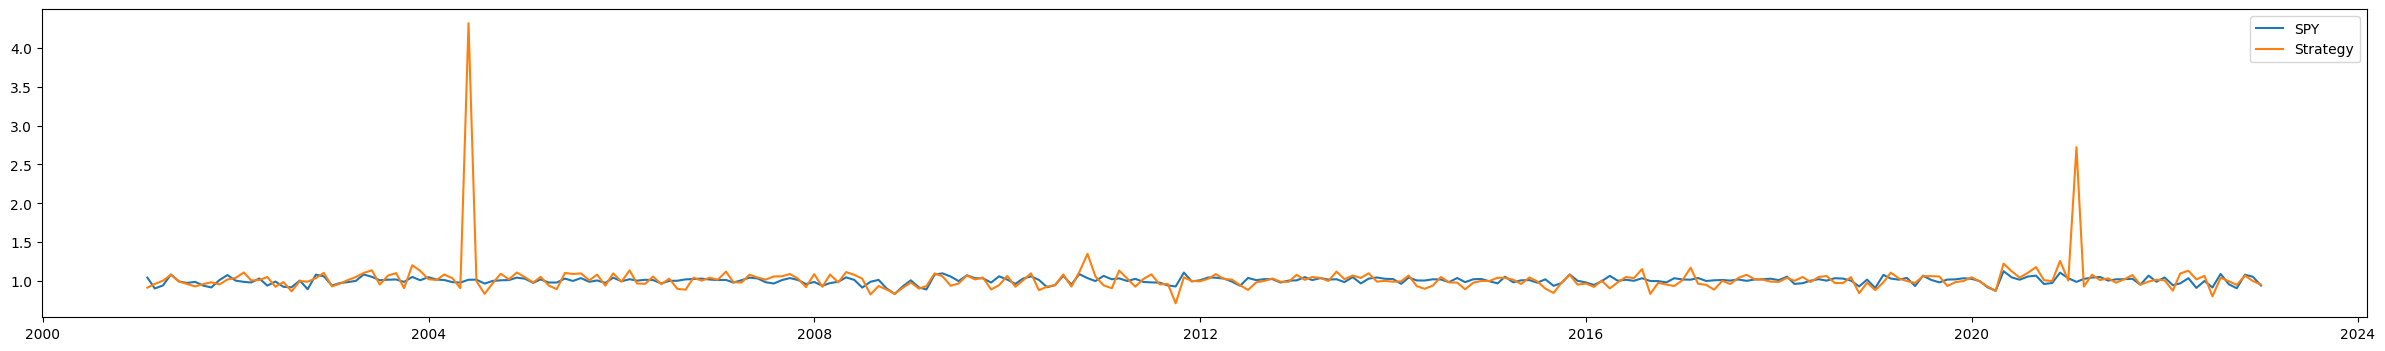

In [18]:
# plot return difference between SPY and strategy
fig = plt.figure(figsize=[30, 4])
plt.plot(market_vs_strategy_monthly)
plt.legend(['SPY', 'Strategy']);

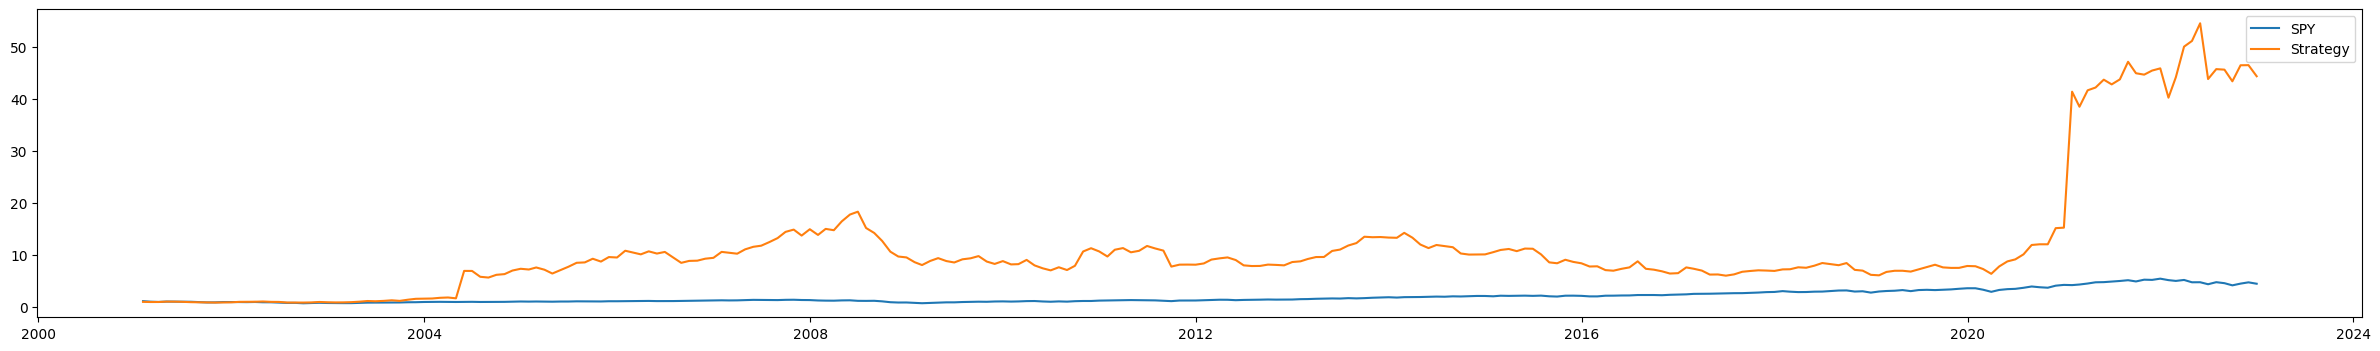

In [19]:
# plot cumulative return difference between SPY and strategy
fig = plt.figure(figsize=[30, 4])
plt.plot(market_vs_strategy_cumulative)
plt.legend(['SPY', 'Strategy']);